In [1]:
# 方法一 均方差
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import random
random.seed(1)

In [3]:
anomalies = []
data = np.random.randn(50000) * 20 + 20

In [4]:
data

array([ 36.65619465,  24.92421799, -14.37566548, ...,  30.72381342,
        15.61273533,  45.13366047])

In [7]:
def find_anomalies(random_data):
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit = random_data_mean - anomaly_cut_off
    upper_limit = random_data_mean + anomaly_cut_off
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [8]:
find_anomalies(data)

[-44.94654308758882,
 83.80172647680942,
 91.31081889525167,
 82.62336198370959,
 -46.44758062487264,
 85.09199442405225,
 -45.98190762374709,
 82.34585570079975,
 -40.524964969294615,
 80.69573143234192,
 82.67478664901455,
 86.7508395471427,
 80.41681086424838,
 88.64912389644574,
 89.99283435184725,
 -40.4171007965239,
 86.77560465671385,
 86.62568899920596,
 -48.60341802546374,
 92.88305793218585,
 81.96913008017191,
 -40.933240419421814,
 -50.93874963874562,
 84.95380110802071,
 83.52700440969036,
 -43.58991098415005,
 -53.4588231945269,
 80.17360566292442,
 -46.1951987438252,
 -40.171797258414614,
 -41.439102886056546,
 -51.524243051410224,
 80.53562856886765,
 91.20853328890898,
 -45.018483867088136,
 -51.04493524982266,
 -41.2989701245031,
 -42.758512130862236,
 -44.037778130988855,
 84.49327653548696,
 85.25917093450003,
 -46.27524911550729,
 -54.42706952513545,
 87.40482468940796,
 93.20694524472584,
 -41.01563663924472,
 98.36749019820365,
 97.5025741869345,
 -41.99413469741

In [9]:
# 方法二：箱形图
import seaborn as sns

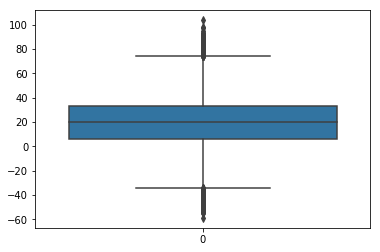

In [12]:
sns.boxplot(data = data)

In [13]:
# 方法三：DBScan聚类
from sklearn.cluster import DBSCAN
random.seed(1)
random_data = np.random.randn(50000,2) * 20 + 20
outlier_detection = DBSCAN(min_samples=2,eps=3)
clusters = outlier_detection.fit_predict(random_data)
list(clusters).count(-1)

81

In [15]:
# 方法4:孤立森林
'''
孤立森林是一种无监督学习算法，属于组合决策树家族。这种方法和以上所有方法都不同。之前的所有方法都在试图寻找数据的常规区域，然后将任何在此定义区域之外的点都视为离群点或异常值。
这种方法的工作方式不同。它明确地隔离异常值, 而不是通过给每个数据点分配一个分数来分析和构造正常的点和区域。它利用了这样一个事实：异常值只是少数，并且它们具有与正常实例非常不同的属性值。
该算法适用于高维数据集，并且被证明是一种非常有效的异常检测方法。由于本文关注的是实现，而不是理论，因此作者不打算进一步讨论算法的工作原理。但是，周志华合著的论文《Isolation Forest》涵盖了其工作方式的全部细节。
'''

from sklearn.ensemble import IsolationForest
random.seed(1)
random_data = np.random.randn(50000,2) * 20 + 20
clf = IsolationForest(behaviour='new',max_samples=100,random_state=1,contamination='auto')
preds = clf.fit_predict(random_data)
print(preds) # 结果是-1，说明这个特定数据点是离群点，1说明不是离群点

[ 1  1 -1 ...  1  1  1]


In [16]:
# 方法5:Robust Random Cut Forest
# 是用于异常检测的无监督算法，它也通过关联异常分数来工作，较低的分数值表示数据点是正常的，较高的分数值则表示数据中存在异常